In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

# Read in Data

In [2]:
df = pd.read_csv('data/train.csv', low_memory=False)
pd.set_option('display.max_columns', 100)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null object
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                       4

# Feature Enginnering

In [5]:
# MachineHoursCurrentMeter
mhcm = df.MachineHoursCurrentMeter
print 'zeros =', (mhcm == 0).sum()
print 'null values =', (mhcm.isnull()).sum()

zeros = 73126
null values = 258360


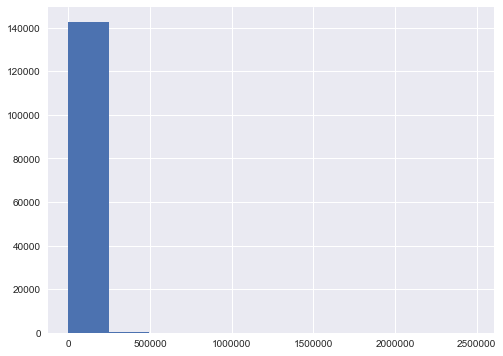

In [6]:
plt.rcParams['figure.figsize'] = (8,6)
mhcm.hist()
plt.show()

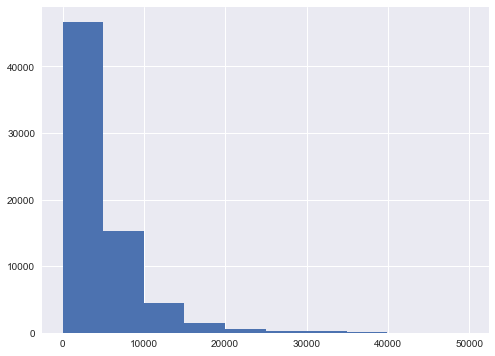

In [7]:
# MachineHoursCurrentMeter is right screwed. Considering it has many null and zero values and many outliers, we are not
# going to include this feature into our final model.
mhcm[(mhcm > 0) & (mhcm < 50000)].hist()
plt.show()

In [8]:
# Choose 'MachineID','ModelID','YearMade','saledate' as model features, and SalePrice as the model target.
df_new = df[['MachineID','ModelID','YearMade','saledate','SalePrice']].copy()

In [9]:
# Check YearMade Distributions: 
# The most frequently occurring value for YearMade is nonsense. These are probably missing values.
df_new.YearMade.value_counts().sort_index()

1000    38185
1919      127
1920       17
1937        1
1942        1
1947        1
1948        3
1949        1
1950        8
1951        7
1952        6
1953        6
1954        3
1955        5
1956       20
1957       15
1958       22
1959       28
1960       97
1961       99
1962      143
1963      246
1964      414
1965      667
1966      943
1967     1086
1968     1247
1969     1529
1970     1314
1971     1705
        ...  
1984     6111
1985     6475
1986     7508
1987    10105
1988    10395
1989    10693
1990    10250
1991     7361
1992     7587
1993    10971
1994    14199
1995    15528
1996    16691
1997    18905
1998    21221
1999    18767
2000    16742
2001    12938
2002    12031
2003    14161
2004    20020
2005    20587
2006    12215
2007     4523
2008     1422
2009      168
2010       25
2011       18
2012        1
2013        1
Name: YearMade, dtype: int64

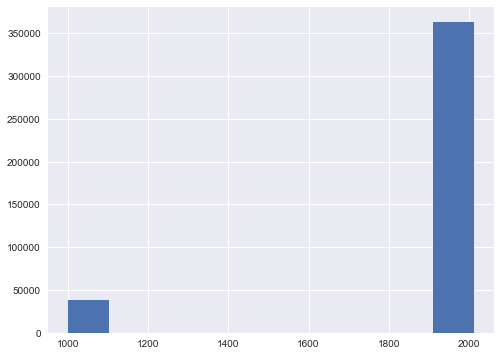

In [10]:
df_new.YearMade.hist()
plt.show()

In [11]:
# YearMade 1000 is around 10% of our data, so perhaps not to drop them.
(df_new.YearMade.value_counts() / df_new.YearMade.count()).head()

1000    0.095195
1998    0.052904
2005    0.051323
2004    0.049910
1997    0.047130
Name: YearMade, dtype: float64

In [12]:
# Instead, we replace the YearMade 1000 with the mode of YearMade.
mode = df_new.YearMade[df_new.YearMade > 1900].mode() # mode is 1998
df_new.loc[df_new.YearMade <= 1900, 'YearMade'] = mode

In [13]:
# Convert type of saledate to datetime type.
df_new['saledate_converted'] = pd.to_datetime(df_new.saledate)

In [14]:
# Creat a new feature to show the equipment age from being made till being sold.
df_new['equipment_age'] = df_new.saledate_converted.dt.year - df_new.YearMade

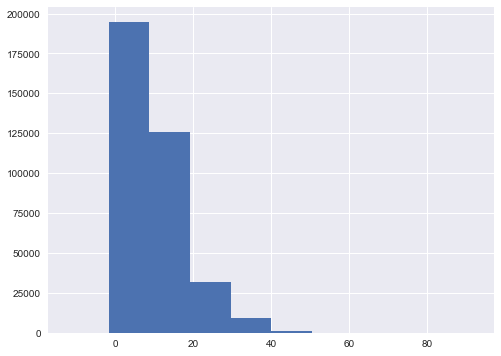

In [15]:
# Distribution of equipment_age
df_new.equipment_age.hist()
plt.show()

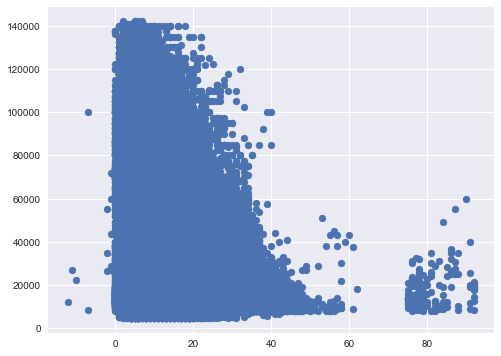

In [16]:
# Show the relationship between equipment_age and SalePrice.
plt.scatter(df_new.equipment_age, df_new.SalePrice)
plt.show()

In [17]:
df_new.dropna(inplace=True)

# Building the Model

In [18]:
feature_cols = ['MachineID', 'ModelID', 'equipment_age']
X = df_new[feature_cols]
y = df_new.SalePrice

In [19]:
# Split the data into trainning and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
# Using RandomForestRegressor algorithm to predict the SalePrice.
rf = RandomForestRegressor(n_estimators=50)

In [21]:
# Cross Validate the trainning dataset and get the r2 score for the training dataset.
cv_score = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2', n_jobs=-1).mean()
cv_score

0.83401458901997594

In [22]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [23]:
# r2 score of testing dataset.
rf.score(X_test, y_test)

0.84090762361647509